當前工作目錄 ==> /home/jovyan/SSNP3D/2_dir
Left Down point: 0.0 0.0
Right Up point:  6000.0 11180.0
height (min, max) 0.0 357.21


Done


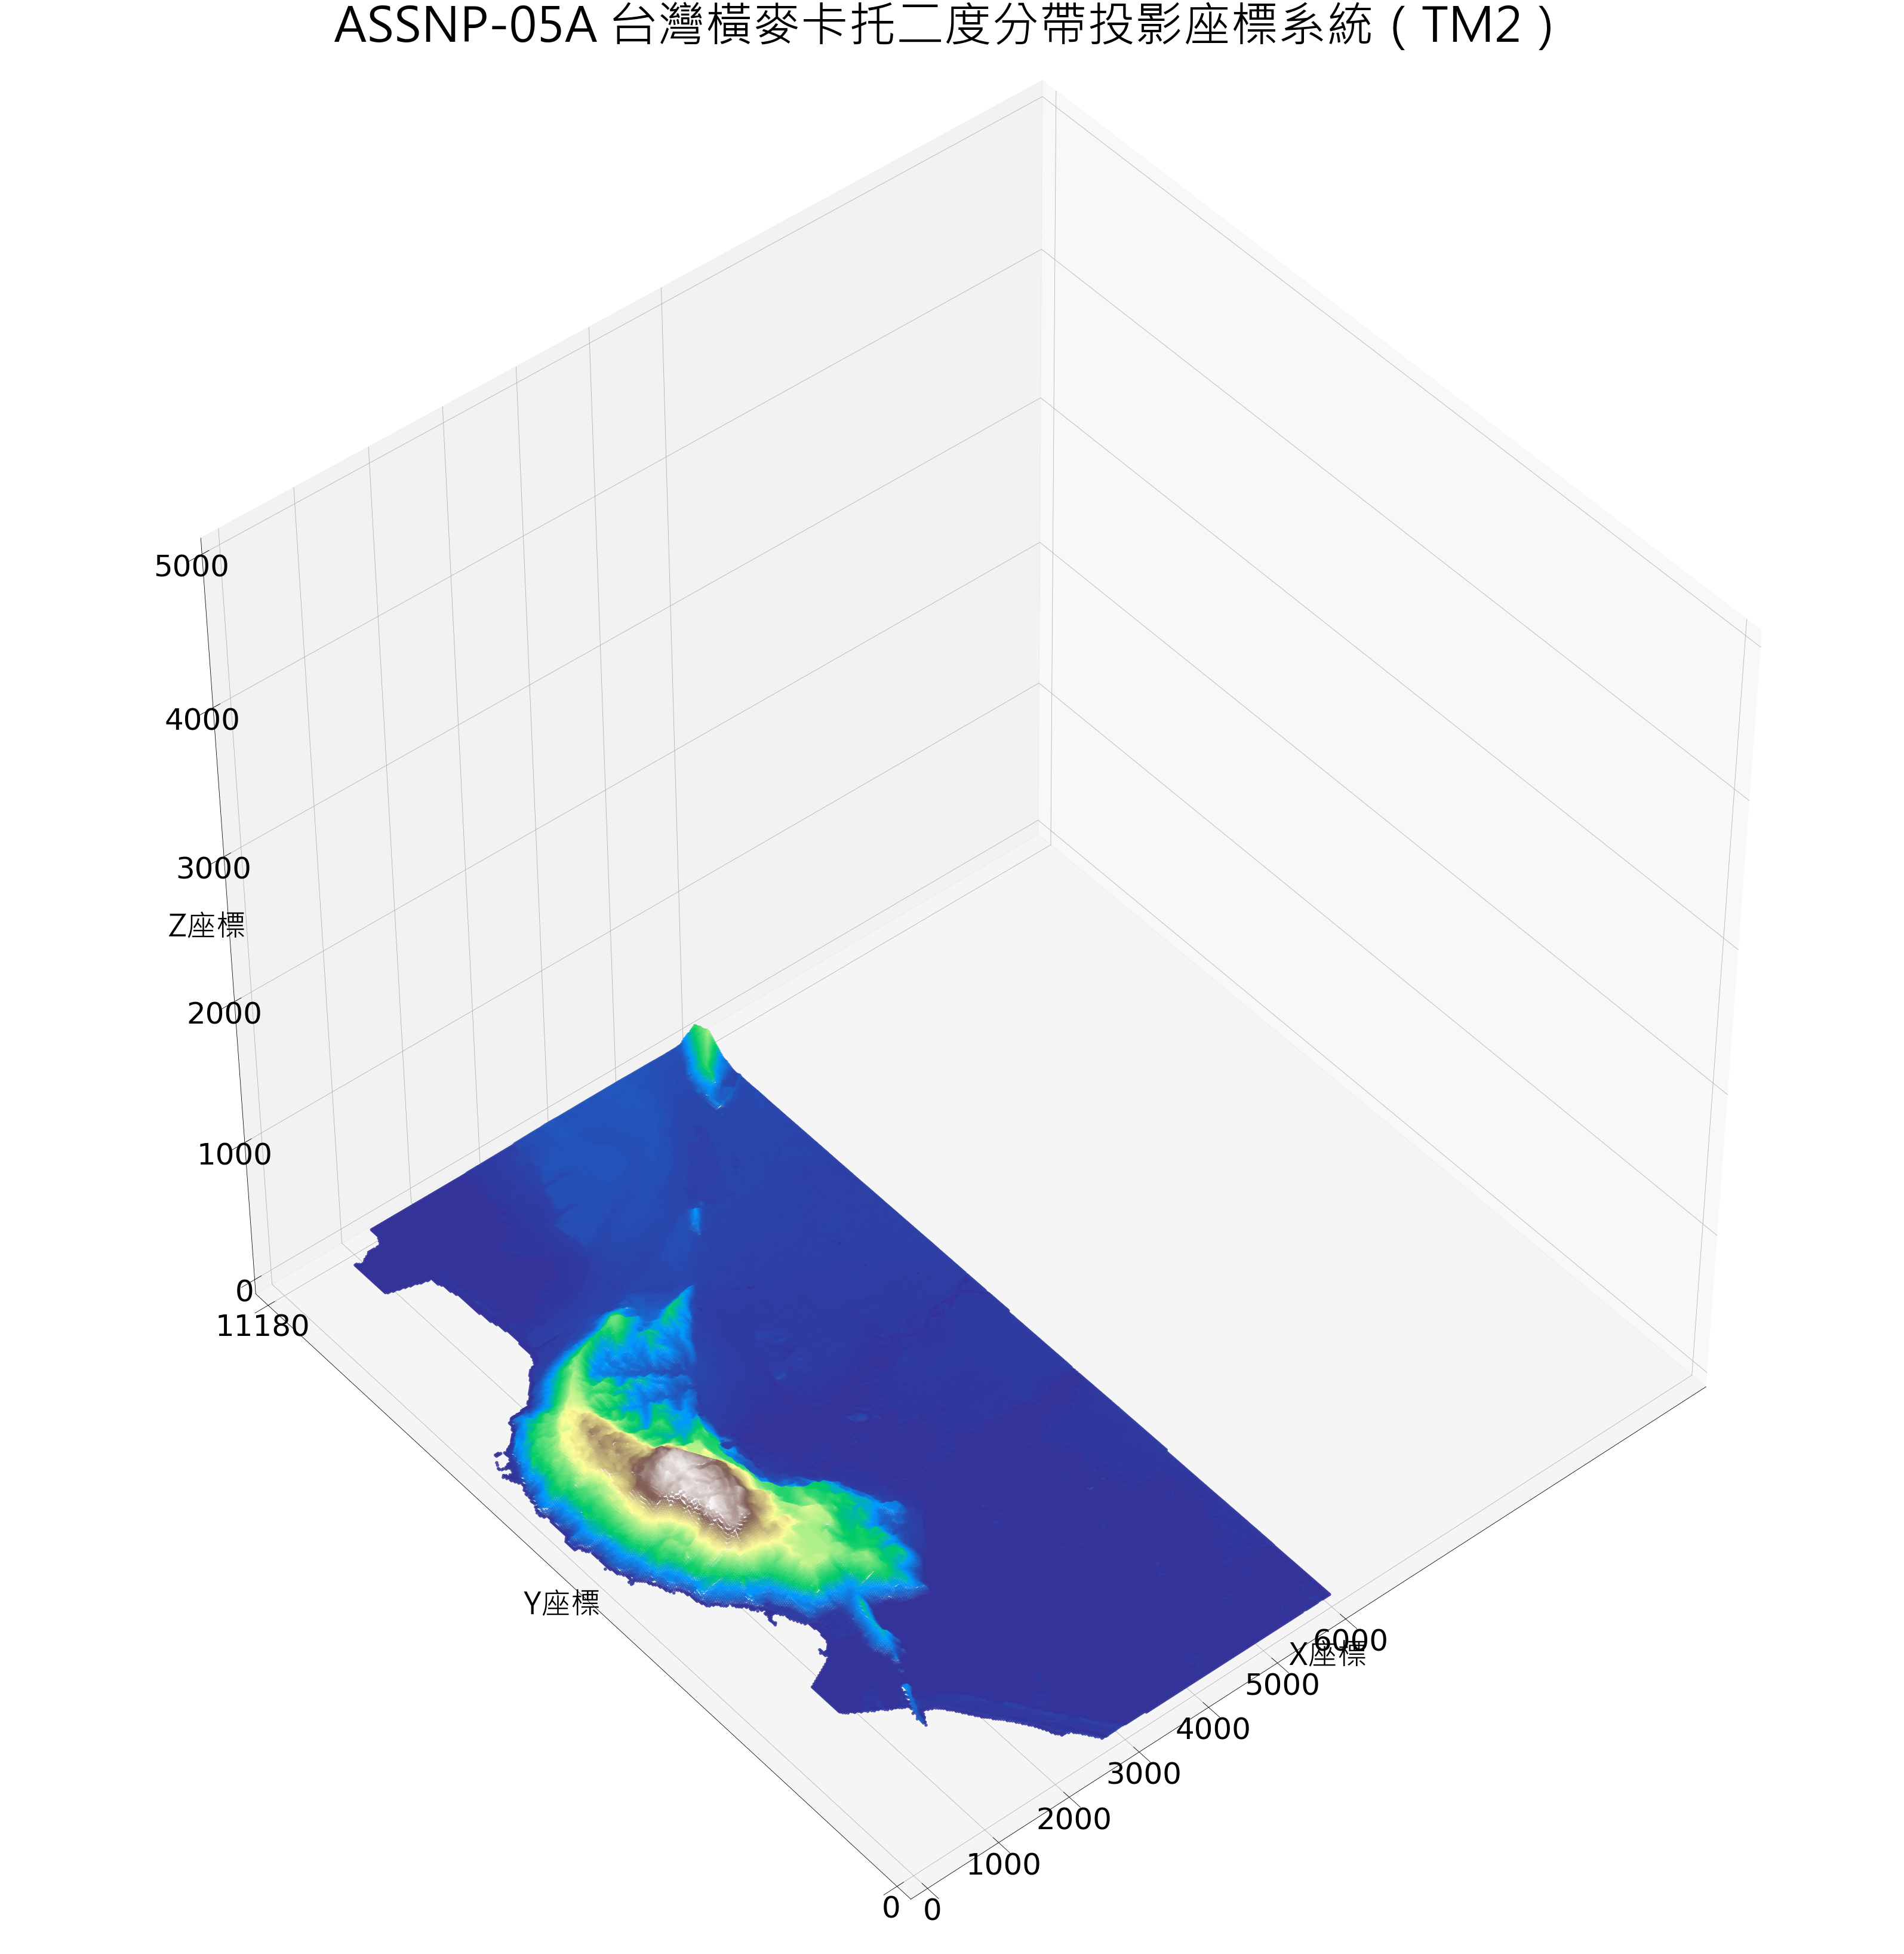

In [1]:
# ASSNP-05A.py
# 2018-11-16
#
# read dem-all-5.csv file
# x,y,z = np.loadtxt(path_data + 'dem_all-5.csv', unpack=True) # transposed array, work for space delimeter
# https://gis.stackexchange.com/questions/66367/display-a-georeferenced-dem-surface-in-3d-matplotlib
# https://stackoverflow.com/questions/12904912/how-to-set-camera-position-for-3d-plots-using-python-matplotlib
# https://matplotlib.org/users/colormaps.html
#
# run on myBinder.org JupyterLab
# 程式檔 path is '/home/jovyan/SSNP3D/2_dir'
# 資料檔 path is '/home/jovyan/SSNP3D/2_dir/data'
# 圖形檔 path is '/home/jovyan/SSNP3D/2_dir/graphic'
#
import os
path = os.getcwd()
print('當前工作目錄 ==>', path)
#
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fontManager
#
from mpl_toolkits.mplot3d.axes3d import *
from shutil import copyfile
from matplotlib import cm # colormap
from pprint import pprint
#
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 2.0   # cm
    right_margin = 2.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 2.0    # cm
    bottom_margin = 2.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
#
# end of def
#
matplotlib.rcParams['pdf.fonttype'] = 42
myfont = fontManager.FontProperties(fname='/home/jovyan/fonts/msjh.ttc')
# ----------------------------------------------------------------------
#
# Left Down point: 0.0 0.0
# Right Up point:  60.0 111.8
# height (min, max) -0.0453 5.3581
#
tup7 = set_graphic_area(112,112)
#
fig = plt.figure(figsize=(tup7[0], tup7[1]))
ax  = fig.add_subplot(1,1,1, projection='3d')
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
plt.xlim(0, 11180)    # set xlim to xMinMax[0], xMinMax[1]
plt.ylim(0, 11180)    # set ylim to yMinMax[0], yMinMax[1]
ax.set_zlim(-1,5000)  # set zlim same scale to show graphic normally
#
# 6000.0 11180
x_ticks = [0,1000,2000,3000,4000,5000, 6000]
y_ticks = [0,11180]
#
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.tick_params(labelsize=50)
#
ax.set_xlabel('X座標', fontproperties=myfont, fontsize=50)
ax.set_ylabel('Y座標', fontproperties=myfont, fontsize=50)
ax.set_zlabel('Z座標', fontproperties=myfont, fontsize=50)
#
path_data    = './data/'
path_graphic = './graphic/'
#
# 逐筆讀入資料 dem-all-5.csv (140547 row)
# Read from the file into the array data(:,:)
# array data shape is (140547, 3)
#
# Columns:
# data[..., 0] is array of float number, 二度分帶 X座標
# data[..., 1] is array of float number, 二度分帶 y座標
# data[..., 2] is array of float number, DEM file z value, float type
#
# 台灣橫麥卡托二度分帶投影座標系統（TM2）
#
data = np.loadtxt(path_data + 'dem-all-5.csv',delimiter=',',dtype='float')
min_item = np.amin(data, axis=0) # axis=0 --> min of each column
max_item = np.amax(data, axis=0) # axis=0 --> max of each column
print ('Left Down point:',  min_item[0], min_item[1])
print ('Right Up point: ' , max_item[0], max_item[1])
print ('height (min, max)', min_item[2], max_item[2])
print ('\n')
#
# TM2_X 二度分帶 X座標
# TM2_Y 二度分帶 Y座標
# TM2_Z DEM file z value, float type
#
TM2_X, TM2_Y, TM2_Z = np.loadtxt(path_data + 'dem-all-5.csv',delimiter=',',unpack=True)
# here TM2_X, TM2_Y, TM2_Z ===> list type
#
# ax.scatter3D(TM2_X, TM2_Y, TM2_Z, c=TM2_Z, cmap=plt.cm.jet, alpha=0.8)       # good
ax.scatter3D(TM2_X, TM2_Y, TM2_Z, c=TM2_Z, cmap=plt.cm.terrain, alpha=0.8) # good
#
# ax.view_init(elev=35, azim=-110) # view_init(elev,azim)两个参数
# ax.view_init(elev=26, azim=230) # view_init(elev,azim)两个参数
ax.view_init(elev=45, azim=230)
plt.draw()
#
# 設定子圖的標題
ax.set_title('ASSNP-05A 台灣橫麥卡托二度分帶投影座標系統（TM2）', fontproperties=myfont, fontsize=80)
#
# bbox_inches='tight' is for display ylabel
# plt.savefig(path_graphic + "Hipparcos-02.png",format="png",dpi=72, bbox_inches='tight')
plt.savefig(path_graphic + "ASSNP-05A.pdf", dpi=300, bbox_inches='tight')
#
print ('Done')